In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#Load the data
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

## Method 1: Trial & Error

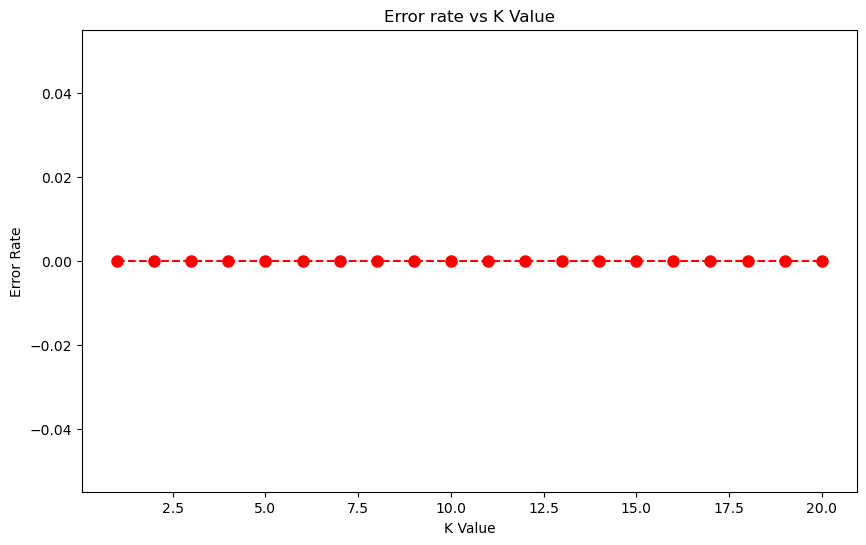

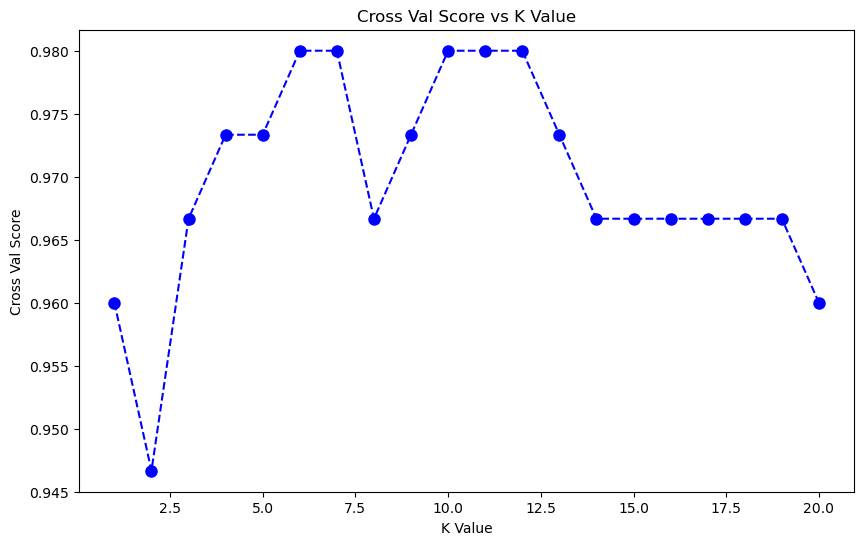

In [6]:
error_rates = []
k_values = range(1, 21) #Try k values from 1 to 20

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)
    
#Plotting Erro rrates vs K Value
plt.figure(figsize=(10,6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='red', markersize = 8)
plt.title("Error rate vs K Value")
plt.xlabel("K Value")
plt.ylabel('Error Rate')
plt.show()

#Method 2: Kfold

cv_score = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X, y, cv=5, scoring='accuracy')
    cv_score.append(np.mean(scores))
#Plotting C Val score Method
plt.figure(figsize=(10,6))
plt.plot(k_values, cv_score, marker='o', linestyle='dashed', color='blue', markersize = 8)
plt.title("Cross Val Score vs K Value")
plt.xlabel("K Value")
plt.ylabel('Cross Val Score')
plt.show()